In [1]:
from pathlib import Path
import ross as rs
import numpy as np
from ross.units import Q_
from ross.probe import Probe


# uncomment the lines below if you are having problems with plots not showing
# import plotly.io as pio
# pio.renderers.default = "notebook"

###################################################
import plotly.io as pio
#pio.renderers.default = "notebook"
pio.renderers.default = "browser"
###################################################

# uncomment the lines below if you are having problems with plots not showing
# import plotly.io as pio
# pio.renderers.default = "notebook"

# The Main procedure of ROSS is "Building the model + Calculating the results".(모델링 + 결과 고찰하기가 핵심!)
# SI unit as default

In [2]:
############################ 자재 저장 안되어 있을 경우만 실행 시키기 #######################

# Section 1. Material Class

# 1.1 Creating a material
# 새로운 material 을 입력하기 위해서 사용. E, G, rho 중에 2개 입력
# material안에 있는 "name"이 실제로 저장되는 이름

# from E and G_s
steel1 = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9)

# material properties used for Chilbo No.2
brake_p = rs.Material(name="brake_mat", rho=7850*0.749344, E=200e9, G_s=80e9)
lowfan_p = rs.Material(name="lowfan_mat",  rho=7850*0.801282, E=200e9, G_s=80e9)
upfan_p = rs.Material(name="upfan_mat",  rho=7850*0.400442, E=200e9, G_s=80e9)     ## rho be modified
thrcollar_p = rs.Material(name="thrcollar_mat",  rho=7850*1.191540, E=200e9, G_s=80e9)
collarkey_p = rs.Material(name="collarkey_mat",  rho=7850*1.538462, E=200e9, G_s=80e9)
slipring_p = rs.Material(name="slipring_mat", rho=7850*0.654907, E=200e9, G_s=80e9) ## rho be modified
speedsensor_p = rs.Material(name="SSG_mat",  rho=7850*1.333333, E=200e9, G_s=80e9)
rimkey_p = rs.Material(name="rimkey_mat",  rho=7850, E=200e9, G_s=80e9)


# returning attributes
#print("="*36)
#print(f"Young's Modulus: {brake_p.E}")
#print(f"Shear Modulus:    {brake_p.G_s}")

# Saving materials
brake_p.save_material()
lowfan_p.save_material()
upfan_p.save_material()
thrcollar_p.save_material()
collarkey_p.save_material()
slipring_p.save_material()
speedsensor_p.save_material()
rimkey_p.save_material()

# 사용 가능한 material properties 저장 파일 위치 확인하기(2024.12.16)
print(rs.__file__)
print("="*36)
print(rs.Material.available_materials())
#####################################################################################################################

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\__init__.py
['brake_mat', 'lowfan_mat', 'upfan_mat', 'thrcollar_mat', 'collarkey_mat', 'slipring_mat', 'SSG_mat', 'rimkey_mat', 'Steel']


In [2]:
# 사용 가능한 material 불러오기
steel_pp = rs.Material.load_material('Steel')
brake_pp = rs.Material.load_material('brake_mat')
lowfan_pp = rs.Material.load_material('lowfan_mat')
upfan_pp = rs.Material.load_material('upfan_mat')
thrcollar_pp = rs.Material.load_material('thrcollar_mat')
collarkey_pp = rs.Material.load_material('collarkey_mat')
slipring_pp = rs.Material.load_material('slipring_mat')
SSG_pp = rs.Material.load_material('SSG_mat')
rimkey_pp = rs.Material.load_material('rimkey_mat')


In [3]:
#### Disk list 만들기

# 이렇게 station number를 직접 적을때는 station number가 0부터 시작했을 때 규칙을 기반으로 적기 #


# common properites
gr = 9.8 # unit: m2/s


### effective transverse inertia가 필요한 5개 disks
# runner on station 0
# 직접 inertia properties를 이용한 디스크 만들기

# runner on station 0
runner = 21364      # unit: N
runner_l = 0.3947   # unit: m
runner_m = 2200    #unit: kg
runner_Ip = 24427/(4*gr)    #unit : kg*m**2
runner_It = 0.5*runner_Ip + (runner_m*(runner_l)**2)/12    #unit : kg*m**2
runner_Ite = runner_It + runner_m*(runner_l/2)**2

print(f"runner_It on c.g.:{runner_It}")

# 직접 inertia properties를 이용한 디스크 만들기
runner_disk = rs.DiskElement(
    n=0,            # node to input must be inserted.(or an error occurs!)
    m=runner_m,
    Ip=runner_Ip,
    Id=runner_Ite,
    tag="runner_disk"  # A tag to name the element Default is None
)
print(runner_disk)
print("="*36)


# water mass on station 0
watermass_disk = rs.DiskElement(
    n=0,            # node to input must be inserted.(or an error occurs!)
    m=runner_m*0.9,
    Ip=0,
    Id=0,
    tag="watermass_disk"  # A tag to name the element Default is None
)
print(watermass_disk)
print("="*36)


# insert mass deviation(station 5, 28, 33)
mass_dev5_disk = rs.DiskElement(
    n=5,            # node to input must be inserted.(or an error occurs!)
    m=88,
    Ip=0,
    Id=0,
    tag="mass_dev5_disk"  # A tag to name the element Default is None
)
print(mass_dev5_disk)
print("="*36)

mass_dev28_disk = rs.DiskElement(
    n=28,            # node to input must be inserted.(or an error occurs!)
    m=63,
    Ip=0,
    Id=0,
    tag="mass_dev28_disk"  # A tag to name the element Default is None
)
print(mass_dev28_disk)
print("="*36)


mass_dev33_disk = rs.DiskElement(
    n=33,            # node to input must be inserted.(or an error occurs!)
    m=200,
    Ip=0,
    Id=0,
    tag="mass_dev33_disk"  # A tag to name the element Default is None
)
print(mass_dev33_disk)
print("="*36)


# brake on station 32
brake_l = 210*0.001   # unit: m  
brake_m = 400    #unit: kg
brake_Ip = 277.64    #unit : kg*m**2
brake_It = 140.16    #unit : kg*m**2
brake_d = 105*0.001 # distance between the axis of c.g and the new axis // unit: m
brake_Ite = brake_It + brake_m*(brake_d)**2
print(f"brake_It on c.g.:{brake_Ite}")

# 직접 inertia properties를 이용한 디스크 만들기
brake_disk = rs.DiskElement(
    n=32,            # node to input must be inserted.(or an error occurs!)
    m=brake_m,
    Ip=brake_Ip,
    Id=brake_Ite,
    tag="brake_disk"  # A tag to name the element Default is None
)
print(brake_disk)
print("="*36)



# lowfan on station 32
lowfan_l = 56*0.001   # unit: m  
lowfan_m = 500    #unit: kg
lowfan_Ip = 438.45    #unit : kg*m**2
lowfan_It = 219.36    #unit : kg*m**2
lowfan_d = 108*0.001 # distance between the axis of c.g and the new axis // unit: m
lowfan_Ite = lowfan_It + lowfan_m*(lowfan_d)**2
print(f"lowfan_It on c.g.:{lowfan_Ite}")

# 직접 inertia properties를 이용한 디스크 만들기
lowfan_disk = rs.DiskElement(
    n=32,            # node to input must be inserted.(or an error occurs!)
    m=lowfan_m,
    Ip=lowfan_Ip,
    Id=lowfan_Ite,
    tag="lowfan_disk"  # A tag to name the element Default is None
)
print(lowfan_disk)
print("="*36)



# upfan on station 40
upfan_l = 56*0.001   # unit: m  
upfan_m = 250    #unit: kg
upfan_Ip = 219.23    #unit : kg*m**2
upfan_It = 109.68    #unit : kg*m**2
upfan_d = 99*0.001 # distance between the axis of c.g and the new axis // unit: m
upfan_Ite = upfan_It + upfan_m*(upfan_d)**2
print(f"upfan_It on c.g.:{upfan_Ite}")

# 직접 inertia properties를 이용한 디스크 만들기
upfan_disk = rs.DiskElement(
    n=40,            # node to input must be inserted.(or an error occurs!)
    m=upfan_m,
    Ip=upfan_Ip,
    Id=upfan_Ite,
    tag="upfan_disk"  # A tag to name the element Default is None
)
print(upfan_disk)
print("="*36)



# thrcollar on station 48
thrcollar_l = 824*0.001   # unit: m  
thrcollar_m = 2000    #unit: kg
thrcollar_Ip = 188.66    #unit : kg*m**2
thrcollar_It = 207.57    #unit : kg*m**2
thrcollar_d = 258*0.001 # distance between the axis of c.g and the new axis // unit: m
thrcollar_Ite = thrcollar_It + thrcollar_m*(thrcollar_d)**2
print(f"thrcollar_It on c.g.:{thrcollar_Ite}")

# 직접 inertia properties를 이용한 디스크 만들기
thrcollar_disk = rs.DiskElement(
    n=48,            # node to input must be inserted.(or an error occurs!)
    m=thrcollar_m,
    Ip=thrcollar_Ip,
    Id=thrcollar_Ite,
    tag="thrcollar_disk"  # A tag to name the element Default is None
)
print(thrcollar_disk)
print("="*36)


runner_It on c.g.:340.1300273843537
Tag:                      runner_disk
Node:                     0
Mass           (kg):      2200.0
Diam. inertia  (kg*m**2): 425.81
Polar. inertia (kg*m**2): 623.14
Tag:                      watermass_disk
Node:                     0
Mass           (kg):      1980.0
Diam. inertia  (kg*m**2): 0.0
Polar. inertia (kg*m**2): 0.0
Tag:                      mass_dev5_disk
Node:                     5
Mass           (kg):      88.0
Diam. inertia  (kg*m**2): 0.0
Polar. inertia (kg*m**2): 0.0
Tag:                      mass_dev28_disk
Node:                     28
Mass           (kg):      63.0
Diam. inertia  (kg*m**2): 0.0
Polar. inertia (kg*m**2): 0.0
Tag:                      mass_dev33_disk
Node:                     33
Mass           (kg):      200.0
Diam. inertia  (kg*m**2): 0.0
Polar. inertia (kg*m**2): 0.0
brake_It on c.g.:144.57
Tag:                      brake_disk
Node:                     32
Mass           (kg):      400.0
Diam. inertia  (kg*m**2): 144.

In [4]:
# effective It가 필요없는, station 위치에 있는 disks

collarkey_disk = rs.DiskElement.from_geometry(
    n=51-1,
    material=collarkey_pp,
    width=50*0.001,
    i_d=388*0.001,
    o_d=603*0.001,     # done the mass, geometries setup 
    tag="collarkey_disk"
)
print(collarkey_disk)
print("="*36)
slipring_disk1 = rs.DiskElement.from_geometry(
    n=56-1,
    material=slipring_pp,
    width=30.5*0.001,
    i_d=132*0.001,
    o_d=590*0.001,   
    tag="slipring_disk1" 
)
print(slipring_disk1)
print("="*36)
slipring_disk2 = rs.DiskElement.from_geometry(
    n=57-1,
    material=slipring_pp,
    width=39.5*0.001,
    i_d=132*0.001,
    o_d=600*0.001, 
    tag="slipring_disk2"   
)
print(slipring_disk2)
print("="*36)
slipring_disk3 = rs.DiskElement.from_geometry(
    n=58-1,
    material=slipring_pp,
    width=39.5*0.001,
    i_d=132*0.001,
    o_d=600*0.001,   
    tag="slipring_disk3" 
)
print(slipring_disk3)
print("="*36)
SSG_disk = rs.DiskElement.from_geometry(
    n=59,
    material=SSG_pp,    
    width=29.3*0.001,
    i_d=130*0.001,
    o_d=322*0.001,  
    tag="SSG_disk"
)
print(SSG_disk)
print("="*36)
print("="*36)

# the list of total disks
list_of_disks = [runner_disk, watermass_disk, mass_dev5_disk, mass_dev28_disk, mass_dev33_disk, brake_disk, lowfan_disk, upfan_disk, thrcollar_disk, collarkey_disk, slipring_disk1, slipring_disk2, slipring_disk3, SSG_disk]
print(list_of_disks)

Tag:                      collarkey_disk
Node:                     50
Mass           (kg):      101.05
Diam. inertia  (kg*m**2): 3.2682
Polar. inertia (kg*m**2): 6.4943
Tag:                      slipring_disk1
Node:                     55
Mass           (kg):      40.723
Diam. inertia  (kg*m**2): 0.93349
Polar. inertia (kg*m**2): 1.8607
Tag:                      slipring_disk2
Node:                     56
Mass           (kg):      54.638
Diam. inertia  (kg*m**2): 1.296
Polar. inertia (kg*m**2): 2.5777
Tag:                      slipring_disk3
Node:                     57
Mass           (kg):      54.638
Diam. inertia  (kg*m**2): 1.296
Polar. inertia (kg*m**2): 2.5777
Tag:                      SSG_disk
Node:                     59
Mass           (kg):      20.903
Diam. inertia  (kg*m**2): 0.15903
Polar. inertia (kg*m**2): 0.31507
[DiskElement(Id=425.81, Ip=623.14, m=2200.0, color='Firebrick', n=0, scale_factor=1.0, tag='runner_disk'), DiskElement(Id=0.0, Ip=0.0, m=1980.0, color='Firebric

In [5]:
### brg station number는 station 0부터 카운팅 해서 들어가야됨(즉, excel for shaft에서 -1을 해야됨)

## load the shaft from an excel sheet
shaft_file = Path("shaft_si8.xls")

shaft = rs.ShaftElement.from_table(
    file=shaft_file, sheet_type="Model", sheet_name="Model"
)



# sheet 3개
tbnbrg = rs.BearingElement.from_table(n=4, file="bearing_seal3_si.xls", sheet_name="tbnbrg")
lowbrg = rs.BearingElement.from_table(n=27, file="bearing_seal3_si.xls", sheet_name="lowbrg")
uppbrg = rs.BearingElement.from_table(n=46, file="bearing_seal3_si.xls", sheet_name="uppbrg")

bearings = [tbnbrg, lowbrg, uppbrg]

## rotor generation with shaft and disks only
rotor3 = rs.Rotor(shaft, list_of_disks, bearings)


## node 표시를 5개 마다 표시
node_increment = 5
shaft_disk_brg = rotor3.plot_rotor(nodes=node_increment)
shaft_disk_brg.show()



# single bearing element
#file_path = Path("bearing_seal_si.xls")
#bearing = rs.BearingElement.from_table(n=0, file=file_path)
#bearing


# list of bearing elements

# nodes = list with the bearing elements nodes number
# file_path = Path("bearing_seal_si.xls")
# bearings = [rs.BearingElement.from_table(n, file_path, sheet_name=i) for i, n in enumerate(nodes)]

In [6]:
### UCS map
# Whether a synchronous analysis is desired, the method selects "only the foward modes and the frequency of the first forward mode" will be equal to the speed.


stiff_range = (6, 11)   # stiffness range from 10E6 to 10E11 N/m
ucs_results = rotor3.run_ucs(stiffness_range=stiff_range, num=20, num_modes=16)
ucs_fig = ucs_results.plot(frequency_units="RPM")
ucs_fig

In [7]:
#### Bearing coefficent plotting by python(DEC/18th/2024)
## Stiffness vs frequency(hz)


# 첫 번째 플롯 (TBN Bearing)
tbnbrgfig = tbnbrg.plot(['kxx', 'kyy'], frequency_units="RPM")
tbnbrgfig.update_layout(
    title=dict(
        text="TBN Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Stiffness (N/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
tbnbrgfig.show()

# 두 번째 플롯 (Low Bearing)
lowbrgfig = lowbrg.plot(['kxx', 'kyy'], frequency_units="RPM")
lowbrgfig.update_layout(
    title=dict(
        text="Low Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Stiffness (N/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
lowbrgfig.show()

# 세 번째 플롯 (Upper Bearing)
uppbrgfig = uppbrg.plot(['kxx', 'kyy'], frequency_units="RPM")
uppbrgfig.update_layout(
    title=dict(
        text="Upper Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Stiffness (N/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
uppbrgfig.show()


In [11]:
#### Bearing coefficent plotting by python(DEC/18th/2024)
## Damping vs frequency(hz)


# 첫 번째 플롯 (TBN Bearing)
tbnbrgDampfig = tbnbrg.plot(['cxx', 'cyy'], frequency_units="RPM")
tbnbrgDampfig.update_layout(
    title=dict(
        text="TBN Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Damping (N-s/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
tbnbrgDampfig.show()

# 두 번째 플롯 (Low Bearing)
lowbrgDampfig = lowbrg.plot(['cxx', 'cyy'], frequency_units="RPM")
lowbrgDampfig.update_layout(
    title=dict(
        text="Low Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Damping (N-s/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
lowbrgDampfig.show()

# 세 번째 플롯 (Upper Bearing)
uppbrgDampfig = uppbrg.plot(['cxx', 'cyy'], frequency_units="RPM")
uppbrgDampfig.update_layout(
    title=dict(
        text="Upper Bearing",
        x=0.5,  # 타이틀 가운데 정렬
        xanchor="center"
    ),
    xaxis_title="Frequency (Hz)",
    yaxis_title="Damping (N-s/m)",
    legend=dict(x=0, y=1, xanchor="left", yanchor="top"),  # 범례 좌측 상단
)
uppbrgDampfig.show()


In [12]:
## static analysis 를 하려면 일단 여기 실행 필요 ##
static = rotor3.run_static()


# static.plot_deformation()
# static.plot_free_body_diagram()
# static.plot_shearing_force()
# static.plot_bending_moment()

In [7]:
## Running static analysis
print("Disk forces - nodes")
print(rotor3.disk_forces_nodal)
print("")
print("Disk forces - tags")
print(rotor3.disk_forces_tag)

print("")
print("Bearing forces - nodes")
print(rotor3.bearing_forces_nodal)
print("")
print("Bearing forces - tags")
print(rotor3.bearing_forces_tag)
print("")
print("Shaft weight")
print(rotor3.w_shaft)


## Returning forces after storing the results
print("shearing force arrary")
print(static.Vx)
print("")
print("Bending moment array")
print(static.Bm)
print("")
print("Displacement in Y direction")
print(static.deformation)


Disk forces - nodes
{'node_0': 19416.87, 'node_5': 862.972, 'node_28': 617.8095, 'node_33': 1961.3, 'node_32': 4903.25, 'node_40': 2451.625, 'node_48': 19613.0, 'node_50': 990.9288282690856, 'node_55': 399.3518660772415, 'node_56': 535.8055810258177, 'node_57': 535.8055810258177, 'node_59': 204.98377302171338}

Disk forces - tags
{'runner_disk': 21574.3, 'watermass_disk': 19416.87, 'mass_dev5_disk': 862.972, 'mass_dev28_disk': 617.8095, 'mass_dev33_disk': 1961.3, 'brake_disk': 3922.6, 'lowfan_disk': 4903.25, 'upfan_disk': 2451.625, 'thrcollar_disk': 19613.0, 'collarkey_disk': 990.9288282690856, 'slipring_disk1': 399.3518660772415, 'slipring_disk2': 535.8055810258177, 'slipring_disk3': 535.8055810258177, 'SSG_disk': 204.98377302171338}

Bearing forces - nodes
{'node_4': 71764.67008825202, 'node_27': 234162.18670993223, 'node_46': 180073.33631786142}

Bearing forces - tags
{'Bearing 0': 71764.67008825202, 'Bearing 1': 234162.18670993223, 'Bearing 2': 180073.33631786142}

Shaft weight
408

In [13]:
#### rotor model과 static_deformation이 겹치게끔 ploting

import plotly.graph_objects as go

# # Rotor 객체 생성
# rotor3 = rs.Rotor(shaft, list_of_disks, bearings)

# shaft_disk_brg 데이터 (노드 표시)
node_increment = 5
shaft_disk_brg = rotor3.plot_rotor(nodes=node_increment)

# static.plot_deformation 데이터
# static = rotor3.run_static()
deformation_fig = static.plot_deformation()

# y 데이터 추출 및 평탄화
shaft_disk_brg_y_flat = [
    item for trace in shaft_disk_brg['data'] if 'y' in trace and trace['y'] is not None for item in trace['y'] if item is not None
]

deformation_y_flat = [
    item for trace in deformation_fig['data'] if 'y' in trace and trace['y'] is not None for item in trace['y'] if item is not None
]

# 데이터 검증
if not shaft_disk_brg_y_flat or not deformation_y_flat:
    raise ValueError("One of the datasets has no valid y data.")

# 왼쪽 y축 최소 및 최대값 계산
y_min_left = min(shaft_disk_brg_y_flat)
y_max_left = max(shaft_disk_brg_y_flat)

# 오른쪽 y축 최소 및 최대값 계산 (여유 공간 추가)
y_min_right = min(deformation_y_flat)
y_max_right = max(deformation_y_flat)

# 오른쪽 y축 변환 (왼쪽 y축의 중심 0점 맞춤)
right_offset = (y_max_left + y_min_left) / 2  # 왼쪽 y축 중심
y_range_right = y_max_right - y_min_right

# 오른쪽 y축에 여유 공간 추가 (±20%)
padding = 0.2 * y_range_right
y_min_right_transformed = y_min_right - (y_min_right + y_max_right) / 2 + right_offset - padding
y_max_right_transformed = y_min_right_transformed + y_range_right + 2 * padding

# Plotly 그래프 초기화
fig = go.Figure()

# shaft_disk_brg 그래프 데이터 추가 (왼쪽 y축)
for trace in shaft_disk_brg['data']:
    fig.add_trace(
        go.Scatter(
            x=trace['x'],
            y=trace['y'],
            mode=trace['mode'],
            name="Shaft Disk/Bearing",
            line=trace['line']
        )
    )

# static.plot_deformation 그래프 데이터 추가 (오른쪽 y축)
for trace in deformation_fig['data']:
    fig.add_trace(
        go.Scatter(
            x=trace['x'],
            y=trace['y'],
            mode=trace['mode'],
            name="Deformation",
            line=trace['line'],
            yaxis="y2"  # 오른쪽 y축에 추가
        )
    )

# Layout 설정 (오른쪽 y축 중심 조정 및 확장)
fig.update_layout(
    title="Shaft, Disk, Bearings and Static Deformation",
    title_x=0.5,  # 타이틀 가운데 정렬
    xaxis=dict(title="Length along Shaft (m)"),
    yaxis=dict(
        title="Shaft/Disk/Bearing Data",
        side="left",
        showgrid=False,
        range=[y_min_left, y_max_left]  # 왼쪽 y축 범위 설정
    ),
    yaxis2=dict(
        title="Static Deformation (microns)",  # Micron 단위 명시
        side="right",
        overlaying="y",  # 왼쪽 y축과 겹치게 설정
        showgrid=False,
        range=[y_min_right_transformed, y_max_right_transformed]  # 변환 및 확장된 오른쪽 y축 범위 설정
    ),
    showlegend=False,  # 범례 숨기기
    width=1500,
    height=800
)

# 그래프 출력
fig.show()


In [1]:
## 다시 해보기 ###
## 실행하면 넘 오래 걸리고, 결과가 안나옴!###

## critical = rotor3.run_critical_speed(speed_range=(50, 53.8))



In [14]:
# 각 속도를 rpm 단위로 w_range에 추가
speed = [0, 100, 200, 300, 400, 500, 514, 600, 700, 800, 900]

# 단위 환산
Q_ = rs.Q_
spd_range = []
modal_rpm = []


# speed unit transform in RPM 단위로 변환
for spd in speed:
    # 속도를 RPM 단위로 변환하여 spd_range에 추가
    spd_rpm = Q_(spd, "RPM")
    spd_range.append(spd_rpm)
    # print(f"Speed in RPM: {spd_rpm}")

    # rotor3.run_modal 호출
    modal_result = rotor3.run_modal(speed=spd_rpm, num_modes=12)
    modal_rpm.append(modal_result)

print(f"Speed range (RPM): {spd_range}")




Speed range (RPM): [<Quantity(0, 'RPM')>, <Quantity(100, 'RPM')>, <Quantity(200, 'RPM')>, <Quantity(300, 'RPM')>, <Quantity(400, 'RPM')>, <Quantity(500, 'RPM')>, <Quantity(514, 'RPM')>, <Quantity(600, 'RPM')>, <Quantity(700, 'RPM')>, <Quantity(800, 'RPM')>, <Quantity(900, 'RPM')>]


In [15]:
############### Tutorial of Quantity
############### Transformation from Quantity to numbers ############

speeds_rpm = Q_([0, 100, 200, 300], 'rpm')
speeds_rad_per_sec = speeds_rpm.to('rad/s')  # 리스트 전체 변환

# 숫자만 추출
numeric_values = [speed.magnitude for speed in speeds_rad_per_sec]

print(type(numeric_values))  # 출력: [0.0, 10.471975511965978, 20.943951023931955, 31.41592653589793]


<class 'list'>


In [17]:
## 각속도를 rpm 단위로 해서 mode shape 보기
# 514 rpm과 유사한 모드형상을 찾아보자

mode_num = 2  # "0" means the First mode 
modal1_fig = modal_rpm[6].plot_mode_3d(mode=mode_num, frequency_units="RPM")     ##  단위 "Hz"쓰면 주파수, RPM 쓰면 rpm 단위로 환산
# modal1_fig.show()
display(modal1_fig)

## orbit plot
# display(modal_rpm[6].plot_orbit(mode=mode_num, nodes=[0, 25, 50 ]))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1134: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1135: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1142: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\Ap

In [18]:
## Campbell diagram 그리기

spd_range
speed_range=Q_(np.linspace(0, 900, 91), "RPM")
# print(spd_range.type)     # 이건 그냥 list라서 type이 안됨
print(speed_range.shape)   # 이건 ndarray형태임
print(speed_range)
camp = rotor3.run_campbell(speed_range)


(91,)
[0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0 110.0 120.0 130.0 140.0 150.0 160.0 170.0 180.0 190.0 200.0 210.0 220.0 230.0 240.0 250.0 260.0 270.0 280.0 290.0 300.0 310.0 320.0 330.0 340.0 350.0 360.0 370.0 380.0 390.0 400.0 410.0 420.0 430.0 440.0 450.0 460.0 470.0 480.0 490.0 500.0 510.0 520.0 530.0 540.0 550.0 560.0 570.0 580.0 590.0 600.0 610.0 620.0 630.0 640.0 650.0 660.0 670.0 680.0 690.0 700.0 710.0 720.0 730.0 740.0 750.0 760.0 770.0 780.0 790.0 800.0 810.0 820.0 830.0 840.0 850.0 860.0 870.0 880.0 890.0 900.0] RPM


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\rotor_assembly.py:1115: UserWarning:

Extrapolating bearing coefficients. Be careful when post-processing the results.



In [25]:
camp_fig = camp.plot(
    harmonics=[1, 17],  # harmonic frequencies는 어디인지, 여기서는 # of runner blade
    damping_parameter="log_dec", # "damping_ratio"로 옵션 바꿀 수 도 있음
    frequency_range=Q_((0, 1000), "RPM"),  # Damped critical speed range
    # damping_range=(-0.1, 100),  # damping range를 벗어난 지역은 플라팅 안되게도 할 수 있음. default로 해도 좋음
    frequency_units="RPM", # "Hz"로 입력도 가능
    # speed_units="RPM"
)

camp_fig.update_layout(
    title=dict(
        text="Campbell diagram of Chilbo HP #2",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))

display(camp_fig)

In [26]:
########### 여긴 위와 똑같은데 단위만 각속도 단위만 rad/s로 입력하는 것이니 pass #########
# 각 속도를 rad/s 단위로 변환하여 w_range에 추가
speed = [0, 100, 200, 300, 400, 500, 514, 600, 700, 800, 900]


# speed unit tranform in rpm 단위로 환산
w_range = []
for i in speed:
    w_range.append(np.pi * i / 30)
print(f"speed range(rad/s): {w_range}")

modal1 = rotor3.run_modal(speed=w_range[6], num_modes=4)


mode1 = 0  # "0" means the First mode 
modal2_fig = modal1.plot_mode_3d(mode=mode1)     ##  단위 "Hz"쓰면 주파수, RPM 쓰면 rpm 단위로 환산
display(modal2_fig)       #### x, y의 nodal 에서의 displacement 가 다르게 나옴

# display(modal1.plot_orbit(mode=mode_num, nodes=[0, 25, 50 ]))

###############################################
## speed에 따른 wn의 갯수
# len(modal[0].wn)

# speed에 따른 modal의 갯수
# print(len(modal))
# print(f"modal@speed(10rad/s): {modal[0].wn}")
###############################################


# Plotting 3D mode shape
#mode1 = 4  # "0" means the First mode 
#modal1_fig = modal[6].plot_mode_3d(mode=mode1, frequency_units="Hz")
#modal1_fig.show()


# Plotting 2D mode shape
# mode2 = 1  # Second mode
# modal2_fig = modal[0].plot_mode_2d(mode2)
# modal2_fig.show()


#mode1 = 4  # "0" means the First mode 
#modal1_fig = modal_hz.plot_mode_3d(mode=mode1, frequency_units="RPM")     ##  단위 "Hz"쓰면 주파수, RPM 쓰면 rpm 단위로 환산
#modal1_fig.show()


speed range(rad/s): [0.0, 10.471975511965978, 20.943951023931955, 31.41592653589793, 41.88790204786391, 52.35987755982988, 53.82595413150512, 62.83185307179586, 73.30382858376183, 83.77580409572782, 94.24777960769379]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1134: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1135: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:1142: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\user\Ap

In [27]:
## Unbalance Response

G25 = 2.5   # generator rotor unbalance grade
G63 = 6.3   # turbine unbalance grade

W_turbine = 2200       # weight of turbine(kg)
W_gen = 31870       # weight of generator rotor rim + pole + pole key + brake + UP/LO fan(kg)
N_speed = 514   # maximum rotating speed in RPM(514했을때가 900 했을때보다 값이 더 크게 나옴)



u1 = 9550*G63*W_turbine/N_speed      # unit: g-mm // input weight(kg), N(rpm) 
u2 = 9550*G25*W_gen/N_speed      #  unit: g-mm // input weight(kg), N(rpm) 

unit_trans = 10**(-6)       # g-mm -->> kg-m

u1_trans = u1*unit_trans       # g-mm -->> kg-m
u2_trans = u2*unit_trans       # g-mm -->> kg-m

print(f"turbine unbalance: {u1} g-mm")    # unit
print(f"generator unbalance: {u2} g-mm")  # unit

print(f"turbine unbalance: {u1_trans} kg-m")    # unit
print(f"generator unbalance: {u2_trans} kg-m")  # unit


turbine unbalance: 257515.56420233464 g-mm
generator unbalance: 1480342.8988326848 g-mm
turbine unbalance: 0.2575155642023346 kg-m
generator unbalance: 1.4803428988326848 kg-m


In [28]:
## Linear forced response(Unbalance response)

## brg node number
# TGB = 4
# LGB = 27
# UGB = 46

# Unbalance G6.3 on turbine node = 0
n1 = 0
m1 = u1_trans
p1 = 0
# Unbalance G2.5 on gen' rotor node = 36, out of phase with the turbine unbalance
n2 = 36
m2 = u2_trans
p2 = np.pi

## Unbalance response with speed range in rpm
speed = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 514, 550, 600, 650, 700, 750, 800, 850, 900]   # in rpm  ## 0부터 시작해서 11번째가 514rpm
speeds_rpm = Q_(speed, 'rpm')       # rpm in quantity formation
speeds_rad_per_sec = speeds_rpm.to('rad/s')  # rpm => rad/s

# 숫자만 추출
#numeric_values = [speed.magnitude for speed in speeds_rad_per_sec]  # numbers only by unit(rad/s) omit

# print(type(numeric_values))  # 출력: [0.0, 10.471975511965978, 20.943951023931955, 31.41592653589793]


## Campbell에서 사용했던 speed range를 이용하자
# speed_range=Q_(np.linspace(0, 900, 91), "RPM")
#speeds_rad_per_sec = speed.to('rad/s')  # rpm => rad/s

# 숫자만 추출
numeric_values = [i.magnitude for i in speeds_rad_per_sec]  # numbers only by unit(rad/s) omit


results2 = rotor3.run_unbalance_response([n1, n2], [m1, m2], [p1, p2], speeds_rad_per_sec)    # in rpm
# results2 = rotor3.run_unbalance_response([n1, n2], [m1, m2], [p1, p2], w_range)     # in rad/s
# print(w_range)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\rotor_assembly.py:1115: UserWarning:

Extrapolating bearing coefficients. Be careful when post-processing the results.



In [32]:
## Operating Deflected Shape in 3D ###

ODS3d = results2.plot_deflected_shape_3d(speed = numeric_values[11])

ODS3d.update_layout(
    title=dict(
        text="Operating Deflected Shape in 3D of Chilbo HP #2",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))

display(ODS3d)


#ODS2d = results2.plot_deflected_shape_2d(speed = numeric_values[11])
#display(ODS2d)


#results2.plot_deflected_shape(speed=Q_(N_speed, "RPM"))
#oper_spd = Q_(500, "RPM")
# results2.plot_deflected_shape(speed = oper_spd)
#print(speed_range)


In [34]:
## Operating Deflected Shape in 2D ###

import plotly.graph_objects as go
from collections import defaultdict

# Rotor 모델 플롯 데이터 가져오기
node_increment = 5
shaft_disk_brg = rotor3.plot_rotor(nodes=node_increment)

# ODS2d 모델 플롯 데이터 가져오기
ODS2d = results2.plot_deflected_shape_2d(speed = numeric_values[11])


# ODS2d 데이터에서 필요한 데이터 추출 (x별로 최대 y값만 선택)
ods_y_dict = defaultdict(list)
for trace in ODS2d['data']:
    if 'x' in trace and 'y' in trace and trace['x'] is not None and trace['y'] is not None:
        for x, y in zip(trace['x'], trace['y']):
            if y is not None:
                ods_y_dict[x].append(y)

# x별로 최대 y값만 추출
ods_x_flat = sorted(ods_y_dict.keys())
ods_y_flat = [max(ods_y_dict[x]) for x in ods_x_flat]

# 대칭된 y 데이터 생성
ods_y_symmetric = [-y for y in ods_y_flat]  # y 값을 음수로 대칭

# shaft_disk_brg 데이터 추출
shaft_disk_brg_y_flat = [
    item for trace in shaft_disk_brg['data'] if 'y' in trace and trace['y'] is not None for item in trace['y'] if item is not None
]

shaft_disk_brg_x_flat = [
    item for trace in shaft_disk_brg['data'] if 'x' in trace and trace['x'] is not None for item in trace['x'] if item is not None
]

# y축 최소/최대값 설정
y_min_left = min(shaft_disk_brg_y_flat)
y_max_left = max(shaft_disk_brg_y_flat)

y_min_right = min(ods_y_symmetric + ods_y_flat)  # 대칭 포함
y_max_right = max(ods_y_symmetric + ods_y_flat)

# 오른쪽 y축 스케일 조정
# y=0 지점 동일선상에 위치
y_offset = (y_max_left + y_min_left) / 2 - (y_max_right + y_min_right) / 2
y_min_right_aligned = y_min_right + y_offset
y_max_right_aligned = y_max_right + y_offset

# 오른쪽 y축 최대값을 deflected shape의 최대값의 1.1배로 설정
y_max_right_final = max(abs(y_min_right_aligned), abs(y_max_right_aligned)) * 1.1
y_min_right_final = -y_max_right_final  # 대칭 유지

# 그래프 생성
fig = go.Figure()

# Rotor 모델 데이터 추가 (Legend 숨김)
for trace in shaft_disk_brg['data']:
    fig.add_trace(
        go.Scatter(
            x=trace['x'],
            y=trace['y'],
            mode=trace['mode'],
            name="Shaft Disk/Bearing",  # 숨겨진 데이터
            line=trace['line'],
            showlegend=False  # Legend 표시하지 않음
        )
    )

# ODS 데이터 추가
fig.add_trace(
    go.Scatter(
        x=ods_x_flat,
        y=ods_y_flat,
        mode="lines",
        name="ODS(Positive)",
        line=dict(color='red'),
        yaxis="y2"
    )
)

# 대칭된 ODS 데이터 추가
fig.add_trace(
    go.Scatter(
        x=ods_x_flat,
        y=ods_y_symmetric,
        mode="lines",
        name="ODS(Negative)",
        line=dict(color='blue', dash='dash'),
        yaxis="y2"
    )
)

# 레이아웃 업데이트
fig.update_layout(
    title=f"Rotor model and Operating Deflected Shape in {speed[11]} RPM",
    title_x=0.5,
    xaxis=dict(title="Length along Shaft (m)"),
    yaxis=dict(
        title="Shaft/Disk/Bearing Data",
        side="left",
        showgrid=False,
        range=[y_min_left, y_max_left]
    ),
    yaxis2=dict(
        title="Operating Deflected Shape (microns)",
        side="right",
        overlaying="y",
        showgrid=False,
        range=[y_min_right_final, y_max_right_final]  # 대칭된 y축 범위
    ),
    width=1500,
    height=800,
    showlegend=True  # Legend 활성화
)

# 그래프 표시
fig.show()


In [36]:
# probe = Probe(probe_node, probe_orientation)
probe1 = Probe(4, Q_(0, "deg"))  # TGB on node 4, orientation 45°
probe2 = Probe(27, Q_(0, "deg"))  # LGB on node 27, orientation 45°
probe3 = Probe(46, Q_(0, "deg"))  # UGN on node 46, orientation 45°

probe_plot = results2.plot(probe=[probe1, probe2, probe3])


probe_plot.update_layout(
    title=dict(
        text="Bode/Polar Response Plot",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))

display(probe_plot)


# converting the first plot yaxis to log scale
# plot2 = results2.plot(probe=[probe1, probe2], probe_units="rad")
# plot2.update_yaxes(type="log", row=1, col=1)
# plot2

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:279: RuntimeWarning:

invalid value encountered in scalar divide



In [40]:
### TGB, LGB, UGB probe

## TGB probe
probe1 = (4, 0)  # response in x axis (0 degrees) at the left disk of rotor (node = 2)
probe2 = (
    4,
    Q_(90, "deg"),
)  # response in y axis (90 degrees) at the left disk of rotor (node = 2)
fig1 = results2.plot(
    probe=[probe1, probe2],
    probe_units="degrees",
    frequency_units="RPM",
    amplitude_units="µm pkpk",
    phase_units="degrees",
)
fig1.update_layout(
    title=dict(
        text=f"Bode/Polar Response Plot on TGB",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))


## LGB probe
probe3 = (27, 0)  # response in x axis (0 degrees) at the left disk of rotor (node = 2)
probe4 = (
    27,
    Q_(90, "deg"),
)  # response in y axis (90 degrees) at the left disk of rotor (node = 2)
fig2 = results2.plot(
    probe=[probe3, probe4],
    probe_units="degrees",
    frequency_units="RPM",
    amplitude_units="µm pkpk",
    phase_units="degrees",
)
fig2.update_layout(
    title=dict(
        text=f"Bode/Polar Response Plot on LGB",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))



## UGB probe
probe5 = (46, 0)  # response in x axis (0 degrees) at the left disk of rotor (node = 2)
probe6 = (
    46,
    Q_(90, "deg"),
)  # response in y axis (90 degrees) at the left disk of rotor (node = 2)
fig3 = results2.plot(
    probe=[probe5, probe6],
    probe_units="degrees",
    frequency_units="RPM",
    amplitude_units="µm pkpk",
    phase_units="degrees",
)
fig3.update_layout(
    title=dict(
        text=f"Bode/Polar Response Plot on UGB",  # 제목 설정
        x=0.5,  # 가운데 정렬
        xanchor="center"  # 중앙 기준
    ))





# changing to log scale
fig1.update_layout(
    yaxis=dict(
        type="log",
    )
)

fig2.update_layout(
    yaxis=dict(
        type="log",
    )
)

fig3.update_layout(
    yaxis=dict(
        type="log",
    )
)


display(fig1)
display(fig2)
display(fig3)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ross\results.py:279: RuntimeWarning:

invalid value encountered in scalar divide



In [19]:
### Plotting the Orbit using the Matplotlib library
## 앞에서와 plot 하는 방식이 다름

# print(rotor3.ndof)          # total DOFs(= number_dof x (# of station))
# print(rotor3.number_dof)    # number of dof on each station
print(speed)

np.pi

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 514, 550, 600, 650, 700, 750, 800, 850, 900]


3.141592653589793

In [42]:
#### Building the orbit at 496 RPM, 1346 RPM and 2596 RPM for nodes located at
#### the right and left disks (node=2 and node=4)

####  ORBIT AT 514 RPM

opr_spd = 514 # rpm

speed_rads = opr_spd * (2 * np.pi / 60)  # Q_(496, "RPM")
time_samples = 3001


## brg station number
# TGB = 4
# LGB = 27
# UGB = 46

# Unbalance G6.3 on turbine station = 0
n1 = 0
m1 = u1_trans   #
p1 = 0
# Unbalance G2.5 on gen' rotor station = 36, out of phase with the turbine unbalance
n2 = 36
m2 = u2_trans
p2 = np.pi

### Unbalnce build-up
node1 = n1  # Unbalance on turbine station
node2 = n2  # Unbalance on generator rotor station
t = np.linspace(0, 5, time_samples)

F = np.zeros((time_samples, rotor3.ndof))

# Creating the out-of-balancing force input matrix

## Unbalance on turbine station
# harmonic force component on x axis
F[:, rotor3.number_dof * node1 + 0] = (
    m1 * speed_rads**2 * np.cos(speed_rads * t)
)  # as out-of-balancing is a harmonic force

# harmonic force component on y axis
F[:, rotor3.number_dof * node1 + 1] = (
    m1 * speed_rads**2 * np.sin(speed_rads * t)
)  # as out-of-balancing is a harmonic force


## Unbalance on generator rotor station
# harmonic force component on x axis
F[:, rotor3.number_dof * node2 + 0] = (
    m2 * speed_rads**2 * np.cos(speed_rads * t + np.pi)
)  # as out-of-balancing is a harmonic force

# harmonic force component on y axis
F[:, rotor3.number_dof * node2 + 1] = (
    m2 * speed_rads**2 * np.sin(speed_rads * t + np.pi)
)  # as out-of-balancing is a harmonic force



# Using the ROSS’ method to calculate displacements due a force in time domain: run_time_response().

response3 = rotor3.run_time_response(speed_rads, F, t)

# Extracting the response vector throught attribute (.yout)  in x and y axis in both nodes 2 and 4

# TGB = 4
node_response = 4
x1_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 0]
y1_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 1]
t_vector = response3.t

# LGB = 27
node_response = 27
x2_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 0]
y2_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 1]

# UGB = 46
node_response = 46
x3_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 0]
y3_axis_displacement = response3.yout[:, rotor3.number_dof * node_response + 1]


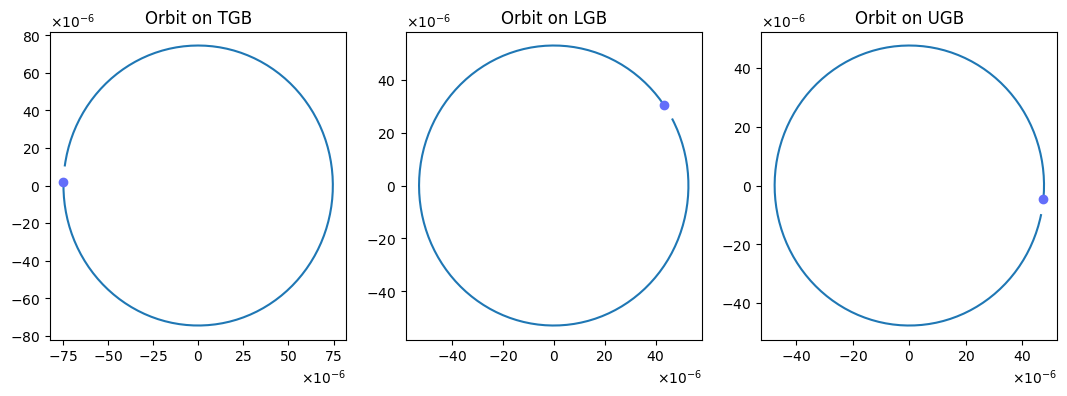

In [59]:
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

##### PLOTTING THE ORBITS

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

# Scaling the graphs in multiples of 1e-6

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-6, -6))

# Choosing a proper cutoff the avoiding transient data and build an almost 360 degrees of the orbit
cutoff = -int(time_samples * 0.023) # best for 0.024


# Plot orbit data at 514 RPM
ax1.plot(x1_axis_displacement[cutoff:], y1_axis_displacement[cutoff:], label="Orbit")   # 뒤에서부터 몇개만 가지고 plotting 한다는 내용
ax1.plot(
    x1_axis_displacement[cutoff:][0],
    y1_axis_displacement[cutoff:][0],
    "o",
    markersize=6,
    
    color="#636EFA",
)

ax1.set_title("Orbit on TGB")
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)


ax2.plot(x2_axis_displacement[cutoff:], y2_axis_displacement[cutoff:], label="Orbit")
ax2.plot(
    x2_axis_displacement[cutoff:][0],
    y2_axis_displacement[cutoff:][0],
    "o",
    markersize=6,
    color="#636EFA",
)
ax2.set_title("Orbit on LGB")
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)


ax3.plot(x3_axis_displacement[cutoff:], y3_axis_displacement[cutoff:], label="Orbit")
ax3.plot(
    x3_axis_displacement[cutoff:][0],
    y3_axis_displacement[cutoff:][0],
    "o",
    markersize=6,
    color="#636EFA",
)
ax3.set_title("Orbit on UGB")
ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)



